In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Kết nối MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Minhthinh@2k5",
    database="DB_STORAGE2"
)

# Lấy toàn bộ dữ liệu từ bảng
query = "SELECT * FROM houses"
df = pd.read_sql(query, conn)

# Đóng kết nối
conn.close()

# Kiểm tra dữ liệu
print(df.shape)     # Số dòng, số cột
print(df.info())    # Kiểu dữ liệu
print(df.head())    # 5 dòng đầu tiên


(1375, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1375 non-null   int64 
 1   location       1375 non-null   object
 2   price          1375 non-null   object
 3   area           1375 non-null   object
 4   date_posted    1375 non-null   object
 5   fridge         1375 non-null   object
 6   washer         1375 non-null   object
 7   air_condition  1375 non-null   object
 8   wifi           1375 non-null   object
dtypes: int64(1), object(8)
memory usage: 96.8+ KB
None
   id           location      price  area date_posted fridge washer  \
0   1    Cẩm Lệ, Đà Nẵng  6900000.0  50.0  2025-09-16      1      1   
1   2  Hải Châu, Đà Nẵng  5000000.0  35.0  2025-08-16      1      1   
2   3  Hải Châu, Đà Nẵng  2500000.0  23.0  2025-07-16      0      0   
3   4  Hải Châu, Đà Nẵng  1000000.0  20.0  2025-07-16      0      0   


C:\Users\PC THINH\AppData\Local\Temp\ipykernel_3672\3452346385.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
#Mô tả thống kê cơ bản→ Giúp bạn biết giá trị trung bình, min, max, độ lệch chuẩn, giá trị thiếu (NaN)...
df.describe(include="all")

,id,location,price,area,date_posted,fridge,washer,air_condition,wifi
count,1375.000000,1375,1375,1375,1375,1375,1375,1375,1375
unique,NaN,7,39,34,37,2,2,2,2
top,NaN,"Hải Châu, Đà Nẵng",1500000.0,20.0,2021-10-21,0,0,0,0
freq,NaN,334,200,356,486,973,940,961,813
mean,697.170909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,398.361852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,354.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,698.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1041.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum().sort_values(ascending=False)

id               0
location         0
price            0
area             0
date_posted      0
fridge           0
washer           0
air_condition    0
wifi             0
dtype: int64

In [10]:
#Ép kiểu dữ liệu đúng chuẩn -> 
print(df.dtypes)
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["area"] = pd.to_numeric(df["area"], errors="coerce")

df["date_posted"] = pd.to_datetime(df["date_posted"], errors="coerce")




id                 int64
location          object
price            float64
area             float64
date_posted       object
fridge            object
washer            object
air_condition     object
wifi              object
dtype: object


In [11]:
print(df.describe(include="all"))
print(df.info())


                 id           location         price         area  \
count   1375.000000               1375  1.375000e+03  1375.000000   
unique          NaN                  7           NaN          NaN   
top             NaN  Hải Châu, Đà Nẵng           NaN          NaN   
freq            NaN                334           NaN          NaN   
mean     697.170909                NaN  7.069607e+07    28.966545   
min        1.000000                NaN  1.000000e+06     5.000000   
25%      354.500000                NaN  1.500000e+06    20.000000   
50%      698.000000                NaN  2.000000e+06    20.000000   
75%     1041.500000                NaN  2.600000e+06    27.000000   
max     1385.000000                NaN  1.000000e+10   390.000000   
std      398.361852                NaN  6.782813e+08    33.982833   

                          date_posted fridge washer air_condition  wifi  
count                            1375   1375   1375          1375  1375  
unique                 

In [12]:
df[df["price"] <= 0]

,id,location,price,area,date_posted,fridge,washer,air_condition,wifi


In [16]:
df = df[(df['price'] >= 1000000) & (df['price'] <= 10000000)]
df = df[(df['area'] >= 10) & (df['area'] <= 50)]

df['district'] = df['location'].apply(lambda x: x.split(',')[0].strip())


In [18]:
print(" Shape sau khi lọc:", df.shape)
print("\n Giá trị thống kê Price:")
print(df['price'].describe())
print("\n Thống kê Area:")
print(df['area'].describe())
print("\n Giá trị unique District:")
print(df['district'].value_counts())



 Shape sau khi lọc: (1261, 10)

 Giá trị thống kê Price:
count    1.261000e+03
mean     2.082157e+06
std      8.428356e+05
min      1.000000e+06
25%      1.500000e+06
50%      1.900000e+06
75%      2.500000e+06
max      6.900000e+06
Name: price, dtype: float64

 Thống kê Area:
count    1261.000000
mean       23.358446
std         6.872188
min        10.000000
25%        20.000000
50%        20.000000
75%        25.000000
max        50.000000
Name: area, dtype: float64

 Giá trị unique District:
district
Hải Châu        325
Ngũ Hành Sơn    241
Liên Chiểu      198
Thanh Khê       191
Cẩm Lệ          174
Sơn Trà         120
Hòa Vang         12
Name: count, dtype: int64


In [19]:
df[df.duplicated(subset=["location", "price", "area"], keep=False)]

,id,location,price,area,date_posted,fridge,washer,air_condition,wifi,district
0,1,"Cẩm Lệ, Đà Nẵng",6900000.0,50.0,2025-09-16,1,1,1,1,Cẩm Lệ
1,2,"Hải Châu, Đà Nẵng",5000000.0,35.0,2025-08-16,1,1,1,1,Hải Châu
2,3,"Hải Châu, Đà Nẵng",2500000.0,23.0,2025-07-16,0,0,0,1,Hải Châu
3,4,"Hải Châu, Đà Nẵng",1000000.0,20.0,2025-07-16,0,0,0,0,Hải Châu
5,6,"Hải Châu, Đà Nẵng",1900000.0,20.0,2025-06-16,0,0,0,0,Hải Châu
...,...,...,...,...,...,...,...,...,...,...
1370,1381,"Hải Châu, Đà Nẵng",1300000.0,25.0,2021-10-23,1,1,1,1,Hải Châu
1371,1382,"Hải Châu, Đà Nẵng",2000000.0,25.0,2021-10-23,0,0,0,0,Hải Châu
1372,1383,"Ngũ Hành Sơn, Đà Nẵng",2300000.0,25.0,2021-10-23,0,0,0,0,Ngũ Hành Sơn
1373,1384,"Hải Châu, Đà Nẵng",1700000.0,28.0,2021-10-23,1,1,1,1,Hải Châu


In [24]:
df = df[df["price"] > 0]
df = df.drop_duplicates()
df = df.dropna(subset=["price", "area"])
duplicates = df[df.duplicated()]
print(f"Số dòng trùng lặp: {len(duplicates)}")
duplicates.head()


Số dòng trùng lặp: 0


,id,location,price,area,date_posted,fridge,washer,air_condition,wifi,district


In [21]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 1261 entries, 0 to 1374
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             1261 non-null   int64         
 1   location       1261 non-null   object        
 2   price          1261 non-null   float64       
 3   area           1261 non-null   float64       
 4   date_posted    1261 non-null   datetime64[ns]
 5   fridge         1261 non-null   object        
 6   washer         1261 non-null   object        
 7   air_condition  1261 non-null   object        
 8   wifi           1261 non-null   object        
 9   district       1261 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 108.4+ KB
None
                id         price         area                    date_posted
count  1261.000000  1.261000e+03  1261.000000                           1261
mean    700.226011  2.082157e+06    23.35844

In [22]:
# Loại bỏ 'Quận', 'quận', chuẩn hóa
df['district'] = df['district'].str.replace(r'Quận |quận ', '', regex=True).str.title().str.strip()


In [29]:
'''
Loại bỏ ngoại lệ (outliers)

Dữ liệu lớn thường có giá “ảo” (nhập sai đơn vị: 200 triệu thay vì 2 triệu).
→ Dùng IQR hoặc quantile để loại bỏ:

'''
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["price"] >= Q1 - 1.5*IQR) & (df["price"] <= Q3 + 1.5*IQR)]


In [34]:
utilities = ['fridge', 'washer', 'air_condition', 'wifi']

for col in utilities:
    df[col] = df[col].apply(lambda x: 1 if '1' in str(x) else 0)

df[utilities] = df[utilities].astype(int)

print(df[utilities].head())
print(df[utilities].mean())


   fridge  washer  air_condition  wifi
2       0       0              0     1
3       0       0              0     0
5       0       0              0     0
6       0       0              0     0
7       1       1              1     1
fridge           0.300648
washer           0.327391
air_condition    0.310373
wifi             0.430308
dtype: float64


In [35]:
# Tính phần trăm tiện ích có trong phòng
utility_percent = (df[['fridge', 'washer', 'air_condition', 'wifi']].mean() * 100).round(2)
print("📊 Tỷ lệ phòng có tiện ích (%):")
print(utility_percent)


📊 Tỷ lệ phòng có tiện ích (%):
fridge           30.06
washer           32.74
air_condition    31.04
wifi             43.03
dtype: float64


In [30]:
import pandas as pd

# 1️⃣ Kiểm tra kích thước dữ liệu
print("📌 Shape dữ liệu:", df.shape)

# 2️⃣ Kiểm tra dữ liệu null
print("\n📌 Null values:")
print(df.isnull().sum())

# 3️⃣ Kiểm tra kiểu dữ liệu của các cột
print("\n📌 Kiểu dữ liệu (dtypes):")
print(df.dtypes)

# 4️⃣ Kiểm tra dữ liệu trùng lặp
dups = df.duplicated().sum()
print(f"\n📌 Số dòng trùng lặp: {dups}")

# 5️⃣ Kiểm tra thống kê cơ bản của số (price, area,…)
print("\n📌 Thống kê mô tả các cột dạng số:")
print(df.describe())

# 6️⃣ Kiểm tra cột category: có giá trị bất thường không?
print("\n📌 Unique District:", df['district'].unique())

# 7️⃣ Kiểm tra logic giá và diện tích
print("\n📌 Giá trị MIN-MAX Price:", df['price'].min(), '-', df['price'].max())
print("📌 Giá trị MIN-MAX Area:", df['area'].min(), '-', df['area'].max())

# 8️⃣ Kiểm tra ngày đăng có lỗi tương lai?
future_date_count = sum(df['date_posted'] > pd.Timestamp.today())
print(f"\n📌 Số bản ghi có ngày đăng trong tương lai: {future_date_count}")

# 9️⃣ Kiểm tra phân phối District (xem có lệch quá không?)
print("\n📌 Số lượng phòng theo quận:")
print(df['district'].value_counts())


📌 Shape dữ liệu: (1234, 10)

📌 Null values:
id               0
location         0
price            0
area             0
date_posted      0
fridge           0
washer           0
air_condition    0
wifi             0
district         0
dtype: int64

📌 Kiểu dữ liệu (dtypes):
id                        int64
location                 object
price                   float64
area                    float64
date_posted      datetime64[ns]
fridge                   object
washer                   object
air_condition            object
wifi                     object
district                 object
dtype: object

📌 Số dòng trùng lặp: 0

📌 Thống kê mô tả các cột dạng số:
                id         price         area                    date_posted
count  1234.000000  1.234000e+03  1234.000000                           1234
mean    701.563209  2.005348e+06    23.061588  2022-04-23 00:05:50.081037312
min       3.000000  1.000000e+06    10.000000            2021-10-16 00:00:00
25%     348.500000  1.5000

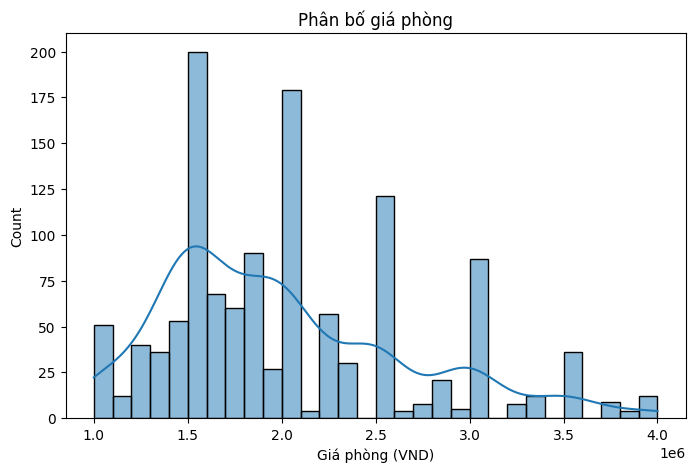

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

# Histogram Price
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel("Giá phòng (VND)")
plt.title("Phân bố giá phòng")
plt.show()

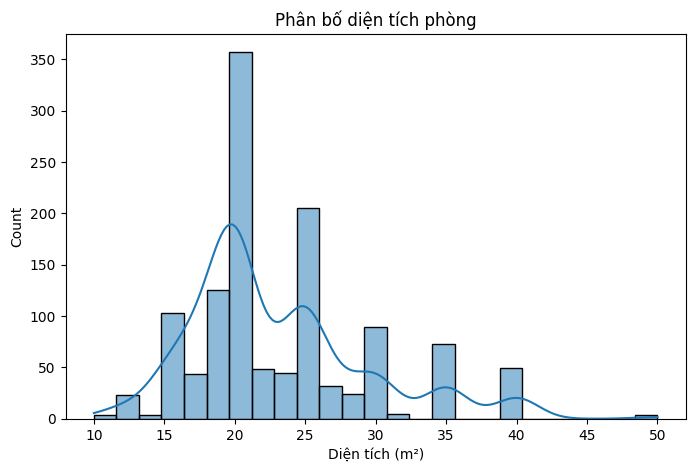

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['area'], bins=25, kde=True)
plt.xlabel("Diện tích (m²)")
plt.title("Phân bố diện tích phòng")
plt.show()

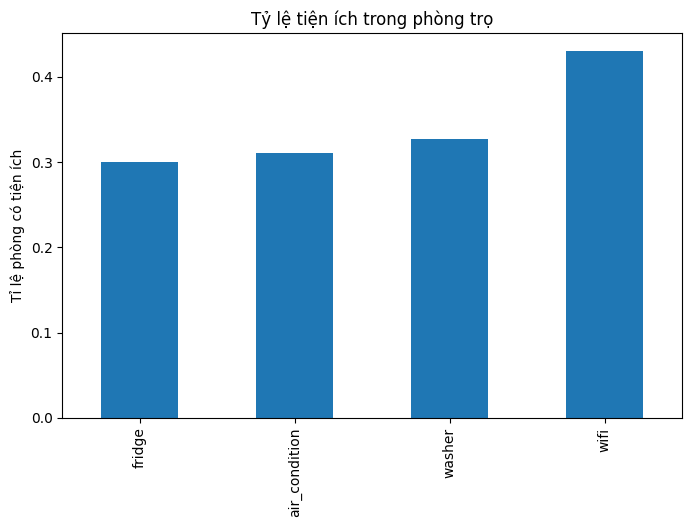

In [36]:
# Utilities
utilities = ['fridge', 'washer', 'air_condition', 'wifi']
df[utilities].mean().sort_values().plot(kind='bar', figsize=(8,5))
plt.ylabel("Tỉ lệ phòng có tiện ích")
plt.title("Tỷ lệ tiện ích trong phòng trọ")
plt.show()